In [1]:
from yucca.training.data_loading.YuccaDataset import YuccaTrainDataset
from yucca.paths import yucca_preprocessed_data
from batchgenerators.utilities.file_and_folder_operations import join, subfiles
from torch.utils.data import DataLoader

In [2]:
from matplotlib import pyplot as plt

samples = subfiles(join(yucca_preprocessed_data, "Task299_Combine", "UnsupervisedPlanner"), suffix=".npy")


dataset = YuccaTrainDataset(
    samples=samples,
    patch_size=(96,) * 3,
    composed_transforms=None,
    task_type="contrastive"
)

print("len", len(dataset))

loader = DataLoader(
    dataset,
    batch_size=2,
)





len 329


torch.Size([2, 1, 96, 96, 96])
torch.Size([2, 1, 96, 96, 96])
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


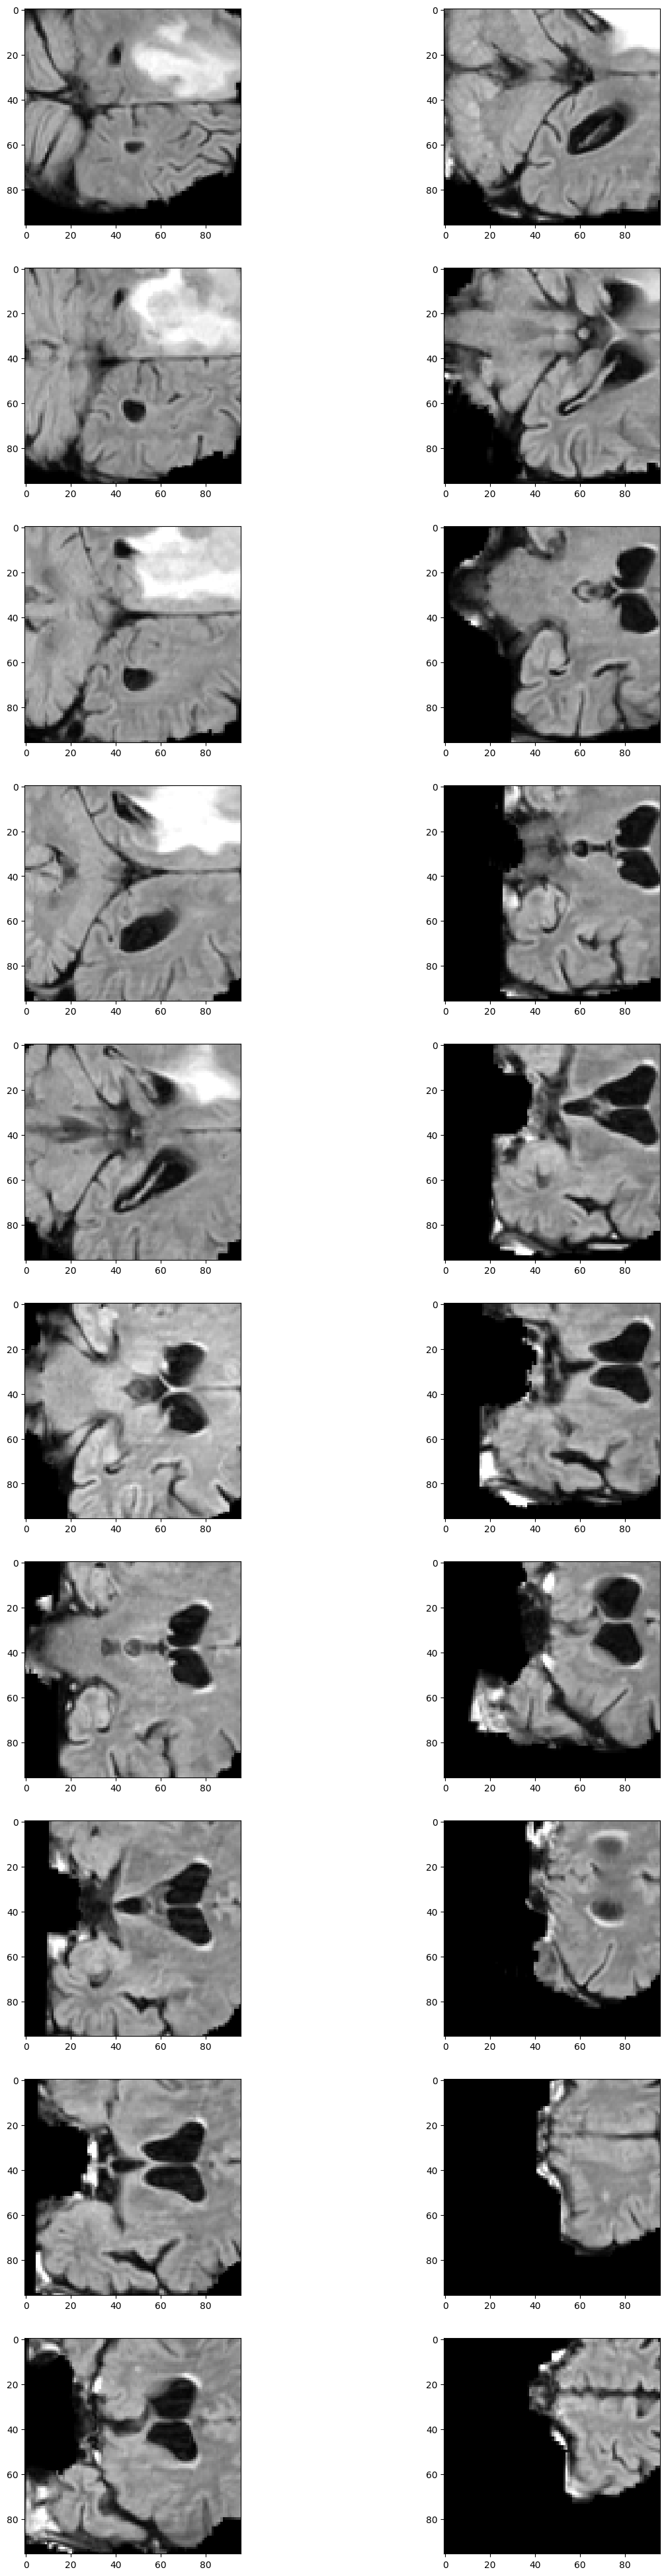

In [3]:
batch = next(iter(loader))
x1, x2 = batch['image']
print(x1.shape)
print(x2.shape)

print(x1.min(), x1.max())
print(x2.min(), x2.max())

n = 10
m = 0

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
for i in range(n):
    axes[i, 0].imshow(x1[0, 0, :, (i*10)+m, :], cmap="gray")
    axes[i, 1].imshow(x2[0, 0, :, (i*10)+m, :], cmap="gray")

plt.show()


In [ ]:


samples = subfiles(join(yucca_preprocessed_data, "Task001_OASIS", "YuccaPlanner"), suffix=".npy")

print(samples)

dataset = YuccaTrainDataset(
    samples=samples,
    patch_size=(96,) * 3,
    composed_transforms=None,
    task_type="unsupervised"
)

print("len", len(dataset))

loader = DataLoader(
    dataset,
    batch_size=2,
)

for batch in loader:
    x = batch['image']
    print(x.shape)
    print(x.min(), x.max())

    n = 10
    m = 0

    fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15, 25))
    for i in range(n):
        axes[i].imshow(x[0, 0, :, (i*10)+m, :], cmap="gray", vmin = 0, vmax = 1)

    plt.show()


